## Breast Cancer Wisconsin (Diagnostic) Data Set
### This data is to predict whether the cancer is benign or malignant
### A fine needle aspirate (FNA) of a breast mass was taken and the features of the dataset were computed from a digitized image of the FNA. The features describe characteristics of the cell nuclei present in the image.
 

## Import necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import data and view first 5 rows 

In [31]:
df = pd.read_csv('breast_cancer.csv')

In [32]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

### One hot encode the diagnosis column


In [33]:
df.diagnosis.replace("M", 1, inplace = True)
df.diagnosis.replace("B", 0, inplace = True)

### Drop the columns that are not needed

In [34]:
df.drop(['id'], axis = 1, inplace = True)

### Check to see if there any null values

In [35]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Find the correlation between the different columns

In [36]:
dfcorr = df.corr(method = 'pearson')
dfcorr

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

### Use heat map to view the correlation, instead

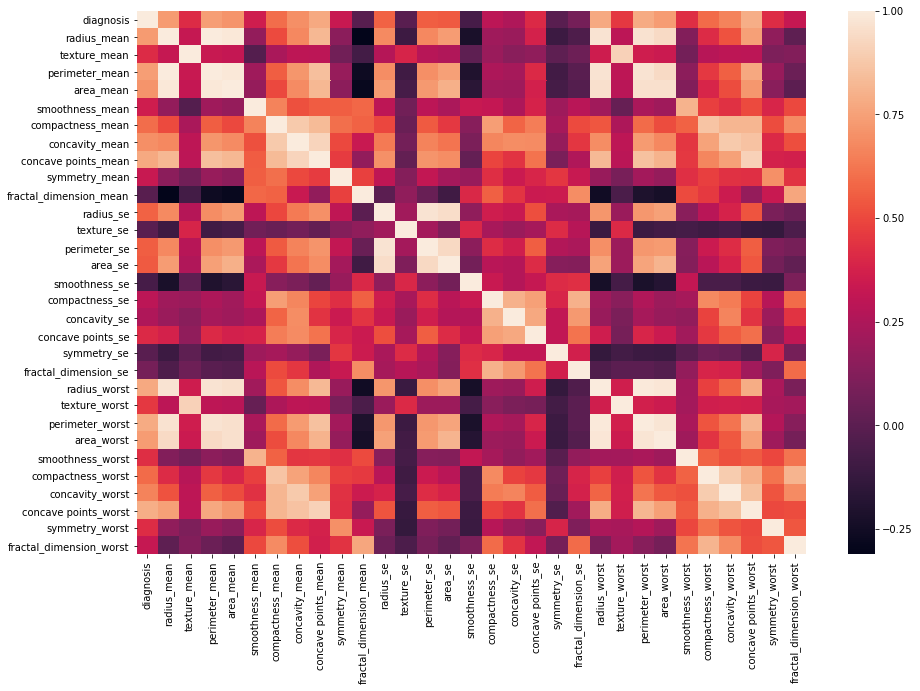

In [37]:
plt.subplots(figsize = (15,10))
sns.heatmap(dfcorr)

## Begin visualizing the correlation between each of the columns

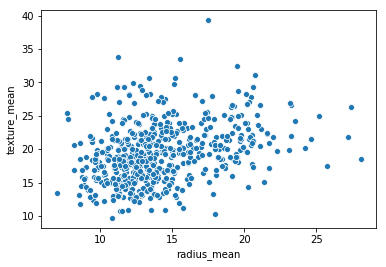

In [38]:
sns.scatterplot('radius_mean', 'texture_mean', data = df)

### These two features have a one-to-one correlation

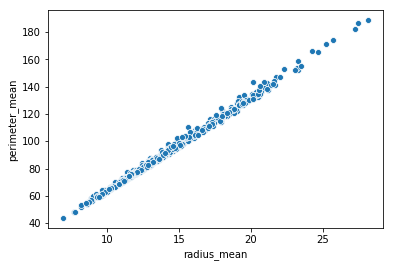

In [39]:
sns.scatterplot('radius_mean', 'perimeter_mean', data = df) 

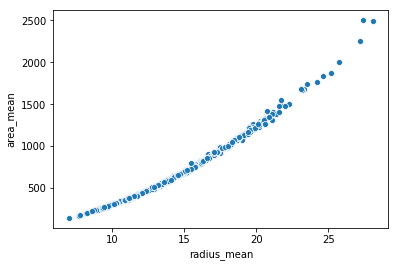

In [40]:
sns.scatterplot('radius_mean', 'area_mean', data = df)

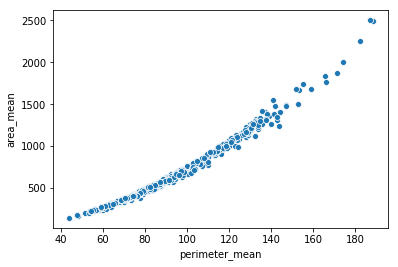

In [41]:
sns.scatterplot('perimeter_mean', 'area_mean', data = df)

### Perimeter_mean and radius mean, from two cells ago, are having the same effect on area_mean

 ### These two also have an almost one-to-one correlation

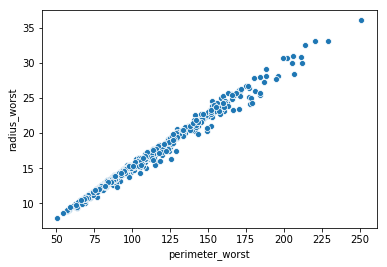

In [42]:
sns.scatterplot('perimeter_worst', 'radius_worst', data = df)

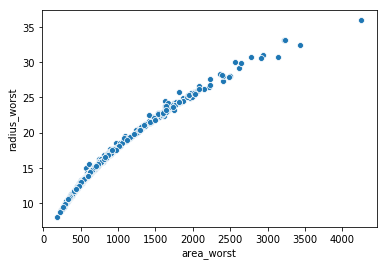

In [43]:
sns.scatterplot('area_worst', 'radius_worst', data = df)

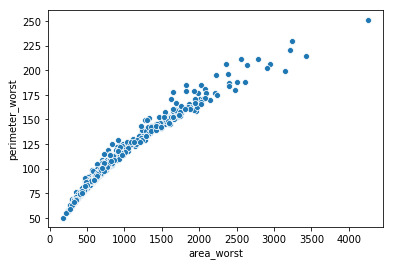

In [44]:
sns.scatterplot('area_worst', 'perimeter_worst', data = df)

## And they have the same effect on area_mean. Because of this I'll drop either radius_mean or perimeter_mean and radius_worst or perimeter_worst . I choose perimeter_mean and perimeter_worst

In [45]:
df.drop(['perimeter_worst', 'perimeter_mean'], axis = 1, inplace = True)

### Visualizing the heatmap without perimeter_worst and perimeter_mean

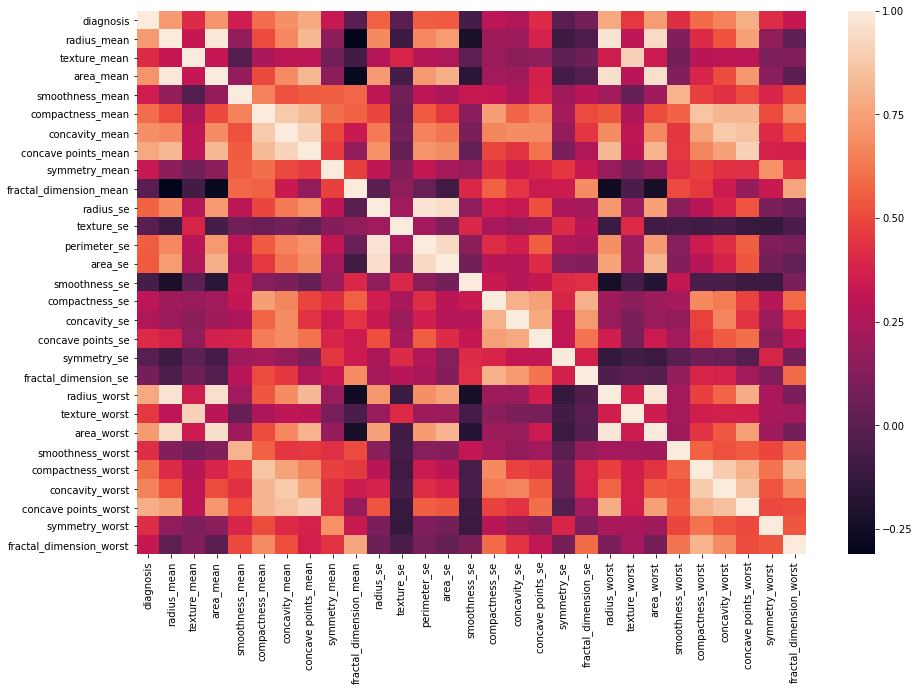

In [47]:
dfcorr = df.corr(method = 'pearson') # It looks only slightly different from the previous one
plt.figure(figsize = (15, 10))
sns.heatmap(dfcorr)

## Split dataset into x and y for training and testing

In [48]:
y = df.iloc[:, :1]

In [50]:
y.head()

diagnosis
0          1
1          1
2          1
3          1
4          1

In [49]:
x = df.iloc[:, 1:]

In [51]:
x.head()

radius_mean  texture_mean  area_mean  smoothness_mean  compactness_mean  \
0        17.99         10.38     1001.0          0.11840           0.27760   
1        20.57         17.77     1326.0          0.08474           0.07864   
2        19.69         21.25     1203.0          0.10960           0.15990   
3        11.42         20.38      386.1          0.14250           0.28390   
4        20.29         14.34     1297.0          0.10030           0.13280   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0          0.3001              0.14710         0.2419                 0.07871   
1          0.0869              0.07017         0.1812                 0.05667   
2          0.1974              0.12790         0.2069                 0.05999   
3          0.2414              0.10520         0.2597                 0.09744   
4          0.1980              0.10430         0.1809                 0.05883   

   radius_se  ...  fractal_dimension_se  radius_worst  texture_worst  \
0     1.0950  ...              0.006193         25.38          17.33   
1     0.5435  ...              0.003532         24.99          23.41   
2     0.7456  ...              0.004571         23.57          25.53   
3     0.4956  ...              0.009208         14.91          26.50   
4     0.7572  ...              0.005115         22.54          16.67   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 28 columns]

### Import training algorithms

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

## Prepare them for fitting

In [53]:
dt = DecisionTreeClassifier(random_state = 1)
rf = RandomForestClassifier()
ss = StandardScaler()
lr = LinearRegression()
lor = LogisticRegression()
gr = GradientBoostingRegressor(learning_rate= 0.9)
gc = GradientBoostingClassifier()
knn = KNeighborsClassifier()
svc = SVC(C = 0.5, kernel='linear')

## Split data into training and testing sets

In [55]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, random_state = 2, test_size = 0.2)

### Begin fitting a scoring the data for accuracy
##### Created a pipeline using Standard Scalar and Random Forest

In [56]:
pipe = Pipeline([('ss',ss),('rf', rf)]) 
pipe.fit(xtrain, ytrain)
pipe.score(xtrain, ytrain)
pipe.score(xtest, ytest)
 

C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.9473684210526315

##### Random Forest

In [57]:
rf.fit(xtrain, ytrain) # Random Forest
rf.score(xtrain, ytrain)
rf.score(xtest, ytest)

C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.9473684210526315

###### Decision Tree

In [58]:
dt.fit(xtrain,ytrain)  
dt.score(xtrain, ytrain)
dt.score(xtest, ytest)

0.9035087719298246

###### Logistic Regression

In [59]:
lor.fit(xtrain,ytrain)  # Logistic Regression
lor.score(xtrain, ytrain)
lor.score(xtest, ytest)

C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9298245614035088

###### Gradient Boosting Classifier

In [60]:
gc.fit(xtrain,ytrain) 
gc.score(xtrain, ytrain)
gc.score(xtest, ytest)

C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9385964912280702

###### KNearest Neighbor

In [61]:
k_range = range(1,10)   
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain,ytrain)
    knn.score(xtrain, ytrain)
    score_knn = round(knn.score(xtest, ytest) * 100, 2)
    scores_list.append(score_knn)

print("The accuracy score achieved using KNN is: " + str(max(scores_list)) + " %")


C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

The accuracy score achieved using KNN is: 92.98 %


C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


### Stacking two algorithms to help boost the training accuracy
#####  KNearest Neighbor and Support Vector Machines (Best Accuracy)

In [62]:
estimators = [('knn', knn), ('svc',svc)]
stack = StackingClassifier(estimators, final_estimator= None)

stack.fit(xtrain, ytrain)
stack.score(xtrain, ytrain)
stack.score(xtest, ytest)

C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.956140350877193

##### Support Vector Machines with a linear kernel

In [63]:
svc = SVC(C = 0.9, kernel='linear')  
svc.fit(xtrain,ytrain)
svc.score(xtrain, ytrain)
svc.score(xtest, ytest)

C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9473684210526315

##### Support Vector Machines with a poly kernel

In [64]:
svc_poly = SVC(C = 0.9, kernel='poly') 
svc_poly.fit(xtrain,ytrain)
svc_poly.score(xtrain, ytrain)
svc_poly.score(xtest, ytest)

C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8947368421052632

##### Support Vector Machines with an rbf kernel

In [65]:
svc_rbf = SVC(C = 0.9, kernel='rbf')
svc_rbf.fit(xtrain,ytrain)
svc_rbf.score(xtrain, ytrain)
svc_rbf.score(xtest, ytest)

C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9035087719298246